## **Predicting The Handwritten Numbers Using CNN**

In [1]:
#importing the libraries
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np


In [2]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
classes = np.unique(y_train).tolist()
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

0

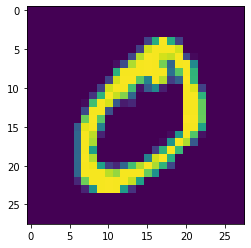

In [4]:
#Visualizing the data
plt.imshow(X_train[1])
classes[y_train[1]]

In [5]:
#Normalizing the image

X_train, X_test = X_train/255, X_test/255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:
# 1. Model architechture
# 2. Compile
# 3. fit
X_train.shape

(60000, 28, 28, 1)

In [8]:
#1. Model Architechture
model = Sequential()

#Convolutional layer 1, need to be increased subsequently
model.add(Conv2D(10, 3, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

#Convolutional layer 2, need to be increased subsequently
model.add(Conv2D(20, 3, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

#Convolutional layer 3, need to be increased subsequently
model.add(Conv2D(40, 3, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

#Flatten
model.add(Flatten())

#Hidden layer 1
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

#Hidden layer 2
model.add(Dense(75, activation='relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.4))

#Hidden layer 3
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss= tensorflow.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs = 20, batch_size=80)

Epoch 1/20
750/750 [==============================] - 33s 6ms/step - loss: 1.0239 - accuracy: 0.6623
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3114 - accuracy: 0.9203
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2257 - accuracy: 0.9452
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1820 - accuracy: 0.9565
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1575 - accuracy: 0.9641
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1417 - accuracy: 0.9659
Epoch 7/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1247 - accuracy: 0.9710
Epoch 8/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1163 - accuracy: 0.9732
Epoch 9/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1084 - accuracy: 0.9752
Epoch 10/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0988 - accuracy: 0.977

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9829


[0.09305364638566971, 0.9829000234603882]

In [12]:
#Prediction
y_pred = model.predict(X_test)

Predicted as -  4
Actual is -  4


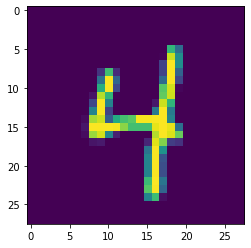

In [35]:
image_row = 19

print('Predicted as - ', str(classes[np.argmax(y_pred[image_row])]))
print('Actual is - ', str(y_test[image_row]))
plt.imshow(X_test[image_row].reshape(28,28))
